In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
sns.set(rc={'figure.figsize':(12,8)})

In [93]:
df2023 = pd.read_csv("felt2023.csv")
df2020=pd.read_csv("felt2020.csv")
df2021=pd.read_csv("felt2021.csv")

In [94]:
df2020['Felt;Dato;Naturtype;Art;type']=df2020['Felt ;Dato;Naturtype;Art;type']
df2020=df2020.drop(columns=['Felt ;Dato;Naturtype;Art;type'])
df2020[['Felt', 'Dato', 'Naturtype', 'Art', 'Type']] = df2020['Felt;Dato;Naturtype;Art;type'].str.split(';', n=5, expand=True)
df2020.drop(columns=['Felt;Dato;Naturtype;Art;type'], inplace=True)
df2020['år']=2020
#df2021['naturtype'] = df2021['naturtype'].replace('mose_kaer', 'mose_kaear')


counts = []
for i in range(1,23):
    count = len(df2020[df2020['Felt'] == str(i)])
    counts.append(count)
new_list = [value for value, count in zip(counts, counts) for _ in range(count)]
df2020['Antal arter i felt']=new_list

In [95]:
df2021['felt_nummer;dato;naturtype;art;type']=df2021['felt_nummer;dato;naturtype;art;type;']
df2021=df2021.drop(columns=['felt_nummer;dato;naturtype;art;type;'])
df2021['felt_nummer;dato;naturtype;art;type'] = df2021['felt_nummer;dato;naturtype;art;type'].str.slice(stop=-1)
df2021[['Felt', 'Dato', 'Naturtype', 'Art', 'Type']] = df2021['felt_nummer;dato;naturtype;art;type'].str.split(';', n=5, expand=True)
df2021.drop(columns=['felt_nummer;dato;naturtype;art;type'], inplace=True)
df2021['år']=2021
df2021['Naturtype'] = df2021['Naturtype'].replace('mose_kaer', 'mose')
df2021['Naturtype'] = df2021['Naturtype'].replace('fersk_eng', 'fersk eng')


counts = []
for i in range(1,23):
    count = len(df2021[df2021['Felt'] == str(i)])
    counts.append(count)
new_list = [value for value, count in zip(counts, counts) for _ in range(count)]
df2021['Antal arter i felt']=new_list

In [96]:
df2023['Felt;Dato;Naturtype;Art;type']=df2023['Felt ;Dato;Naturtype;Art;type']
df2023=df2023.drop(columns=['Felt ;Dato;Naturtype;Art;type'])
df2023[['Felt', 'Dato', 'Naturtype', 'Art', 'Type']] = df2023['Felt;Dato;Naturtype;Art;type'].str.split(';', n=5, expand=True)
df2023.drop(columns=['Felt;Dato;Naturtype;Art;type'], inplace=True)
df2023['år']=2023

counts = []
for i in range(1,23):
    count = len(df2023[df2023['Felt'] == str(i)])
    counts.append(count)
new_list = [value for value, count in zip(counts, counts) for _ in range(count)]
df2023['Antal arter i felt']=new_list

In [99]:
new_df2023=df2023[[ 'Naturtype', 'Antal arter i felt', 'år', 'Type']]
new_df2020=df2020[[ 'Naturtype', 'Antal arter i felt', 'år', 'Type']]
new_df2021=df2021[[ 'Naturtype', 'Antal arter i felt', 'år', 'Type']]
cat_df=pd.concat([new_df2023, new_df2020, new_df2021], axis=0)
cat_df=cat_df.reset_index(drop=True)

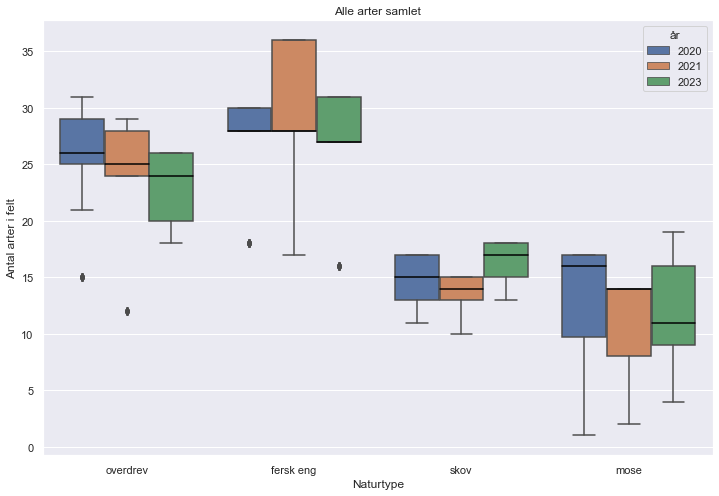

In [133]:
sns_plot=sns.boxplot(x='Naturtype', y='Antal arter i felt', data=cat_df,hue='år', notch=False,medianprops=dict(color="black", alpha=1),) 
sns_plot.set(title='Alle arter samlet')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('AlleArter.png')


In [110]:
graminoid_df = cat_df[cat_df['Type'] == 'Graminoid']
vedplante_df = cat_df[cat_df['Type'] == 'Vedplante']
urt_df=cat_df[cat_df['Type'] == 'Bredbladet urt']

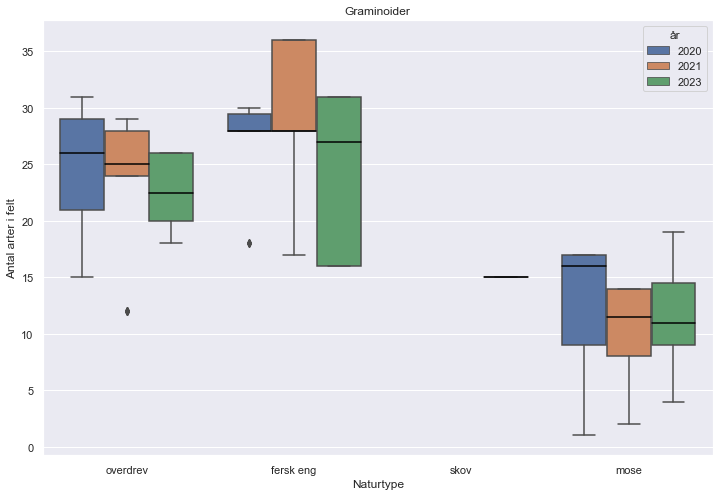

In [132]:
sns_plot=sns.boxplot(x='Naturtype', y='Antal arter i felt', data=graminoid_df,hue='år', notch=False,medianprops=dict(color="black", alpha=1),) 
sns_plot.set(title='Graminoider')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('graminoid.png')


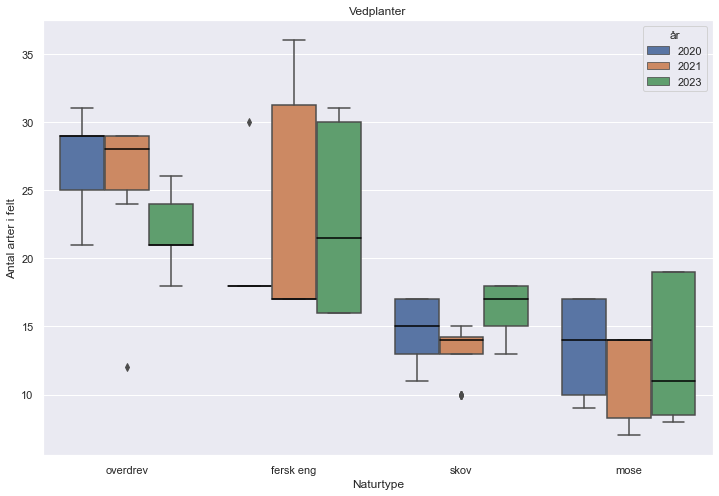

In [131]:
sns_plot=sns.boxplot(x='Naturtype', y='Antal arter i felt', data=vedplante_df,hue='år', notch=False,medianprops=dict(color="black", alpha=1),) 
sns_plot.set(title='Vedplanter')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('vedplante.png')


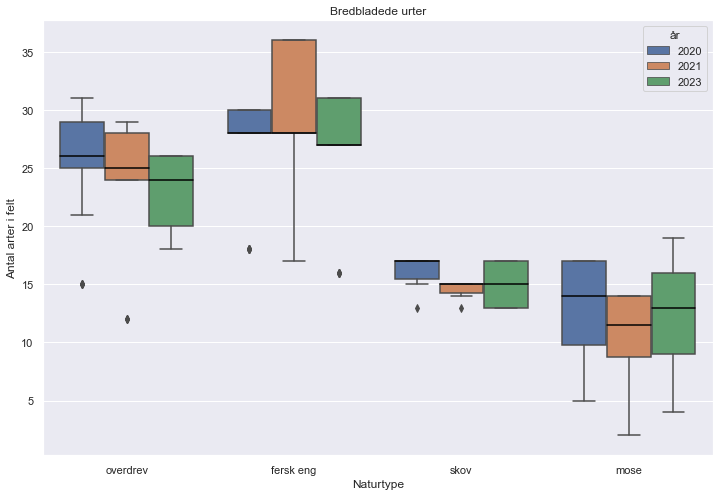

In [130]:
sns_plot=sns.boxplot(x='Naturtype', y='Antal arter i felt', data=urt_df,hue='år', notch=False,medianprops=dict(color="black", alpha=1))
sns_plot.set(title='Bredbladede urter')
plt.show()
fig = sns_plot.get_figure()
fig.savefig('bredurt.png')


In [168]:
liste=list(df2023['art'])

In [176]:
count_list=[]
for i in liste:
    count_list.append((liste.count(i), i))
unique_list=[]
for i in count_list:
    if i not in unique_list:
        unique_list.append(i)

In [183]:
unique_list.sort()
unique_list
x_list=[i[1] for i in unique_list]
y_list=[i[0] for i in unique_list]

In [194]:
len(x_list)

162

In [29]:
latrin_feb=[6.7, 7.6, 4.5, 6.5, 4.1, 8.7, 5.5, 8.0, 10.7, 5.5, 10.5, 8.3, 5.0, 5.1, 19.4, 26.4, 6.2, 6.7, 7.4, 8.1, 3.5]
latrin_maj=[6.7, 16.7, 4.4, 9.5, 7.3, 8.1, 7.7, 4.1, 14.7, 7.6, 10.2, 4.3, 7.3, 2.9, 6.6, 7.6, 4.3, 8.3, 4.7, 10.7, 5.5]
afgræs_feb=[1.3, 1.2, 1.7, 1.7, 0.4, 3.6, 2.6, 3.9, 1.4, 4.0, 1.5, 0.6, 2.1, 1.2, 1.1, 2.0, 1.8, 1.4, 2.5, 2.1, 4.2]
afgræs_maj=[5.0, 3.9, 1.3, 1.0, 1.0, 5.0, 2.2, 2.8, 1.6, 2.2, 0.8, 2.9, 5.5, 1.4, 7.6, 1.7, 1.8, 1.6, 2.2, 8.6, 3.3]

latrin_feb_data = {'Data': latrin_feb, 'Category': 'latrin', 'Month': 'februar', 'Combined': 'latrin_feb'}
latrin_feb_df = pd.DataFrame(latrin_feb_data)

latrin_maj_data = {'Data': latrin_maj, 'Category': 'latrin', 'Month': 'maj', 'Combined': 'latrin_maj'}
latrin_maj_df = pd.DataFrame(latrin_maj_data)

afgræs_feb_data = {'Data': afgræs_feb, 'Category': 'afgræs', 'Month': 'februar', 'Combined': 'afgræs_feb'}
afgræs_feb_df = pd.DataFrame(afgræs_feb_data)

afgræs_maj_data = {'Data': afgræs_maj, 'Category': 'afgræs', 'Month': 'maj', 'Combined': 'afgræs_maj'}
afgræs_maj_df = pd.DataFrame(afgræs_maj_data)

cat_df_weight=pd.concat([latrin_feb_df, latrin_maj_df, afgræs_feb_df, afgræs_maj_df], axis=0)
cat_df_weight=cat_df_weight.reset_index(drop=True)

In [48]:
sns.set(rc={'figure.figsize':(10,8)})

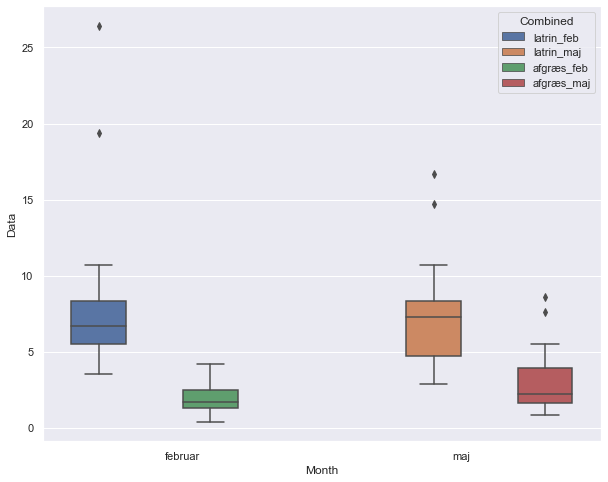

In [51]:
weight_plot=sns.boxplot(data=cat_df_weight, x='Month',y='Data', hue='Combined')
#sns.stripplot(data=cat_df_weight, x='Month',y='Data', hue='Combined')
plt.show()
fig = weight_plot.get_figure()
fig.savefig('weightplot.png')

In [38]:
latrin_feb_mean=np.mean(latrin_feb)
latrin_maj_mean=np.mean(latrin_maj)
afgræs_feb_mean=np.mean(afgræs_feb)
afgræs_maj_mean=np.mean(afgræs_maj)

In [39]:
#forskel mellem den gennemsnitlige græsvægt i februar mellem latrin og afgræs er 6.29 gram
latrin_feb_mean-afgræs_feb_mean

6.2904761904761894

In [40]:
#forskel mellem den gennemsnitlige græsvægt i maj mellem latrin og afgræs er 4.56 gram
latrin_maj_mean-afgræs_maj_mean

4.561904761904762

In [41]:
#i vægt er der en stigning på 8.7 procent græs i de latrine områder (fra feb til maj)
abs(latrin_feb_mean-latrin_maj_mean)/(latrin_feb_mean)

0.08715596330275222

In [42]:
#i vægt er der en stigning på 49.88 procent græs i de afgræssede områder (fra feb til maj)

abs(afgræs_feb_mean-afgræs_maj_mean)/(afgræs_feb_mean)

0.4988179669030732

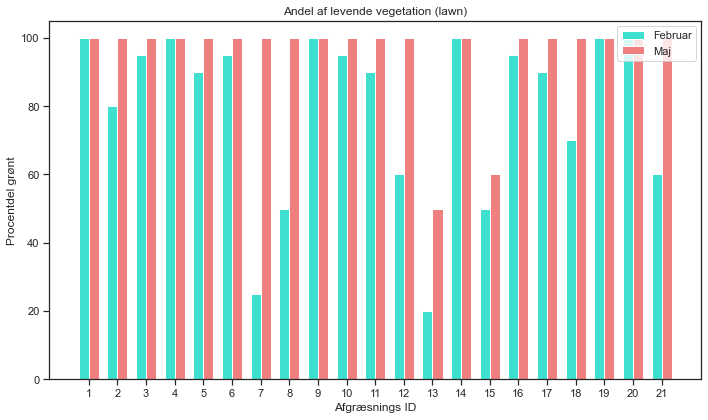

In [201]:


sns.set(style="ticks")

# Data
maj_data = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 50, 100, 60, 100, 100, 100, 100, 100, 100]
februar_data = [100, 80, 95, 100, 90, 95, 25, 50, 100, 95, 90, 60, 20, 100, 50, 95, 90, 70, 100, 100, 60]

# Generate x-axis values
x = np.arange(1, 22)
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - bar_width/2, februar_data, bar_width, label='Februar', color='turquoise')
rects2 = ax.bar(x + bar_width/2, maj_data, bar_width, label='Maj', color='lightcoral')

ax.set_xlabel('Afgræsnings ID')
ax.set_ylabel('Procentdel grønt')
ax.set_title('Andel af levende vegetation (lawn)')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('lawn.png')


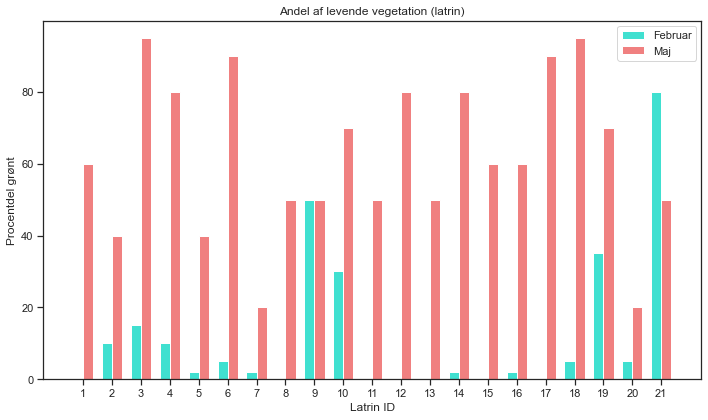

In [202]:

sns.set(style="ticks")

# Data
februar_data = [0, 10, 15, 10, 2, 5, 2, 0, 50, 30, 0, 0, 0, 2, 0, 2, 0, 5, 35, 5, 80]
maj_data = [60, 40, 95, 80, 40, 90, 20, 50, 50, 70, 50, 80, 50, 80, 60, 60, 90, 95, 70, 20, 50]

# Generate x-axis values
x = np.arange(1, 22)
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

rects2 = ax.bar(x - bar_width/2, februar_data, bar_width, label='Februar', color='turquoise')

rects1 = ax.bar(x + bar_width/2, maj_data, bar_width, label='Maj', color='lightcoral')

ax.set_xlabel('Latrin ID')
ax.set_ylabel('Procentdel grønt')
ax.set_title('Andel af levende vegetation (latrin)')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('latrin.png')


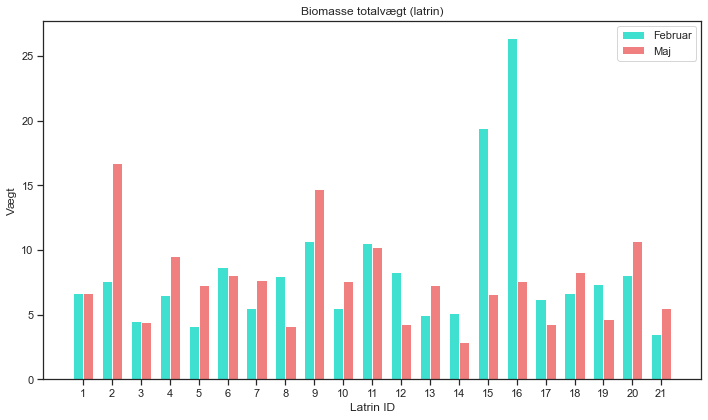

In [203]:
sns.set(style="ticks")


# Generate x-axis values
x = np.arange(1, 22)
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

rects2 = ax.bar(x - bar_width/2, latrin_feb, bar_width, label='Februar', color='turquoise')

rects1 = ax.bar(x + bar_width/2, latrin_maj, bar_width, label='Maj', color='lightcoral')

ax.set_xlabel('Latrin ID')
ax.set_ylabel('Vægt')
ax.set_title('Biomasse totalvægt (latrin)')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('latrin_vgt.png')


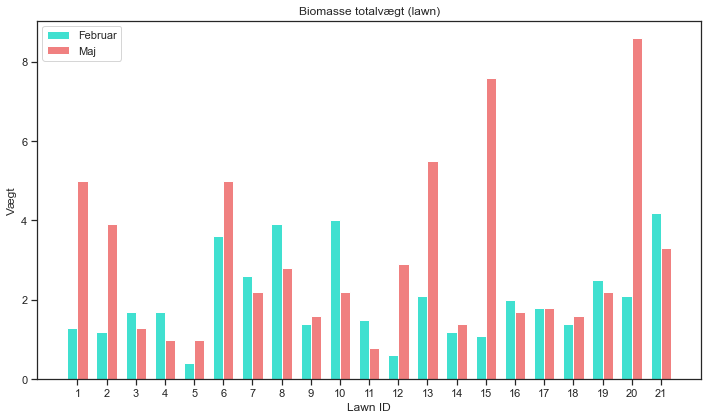

In [207]:
sns.set(style="ticks")


# Generate x-axis values
x = np.arange(1, 22)
bar_width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

rects2 = ax.bar(x - bar_width/2, afgræs_feb, bar_width, label='Februar', color='turquoise')

rects1 = ax.bar(x + bar_width/2, afgræs_maj, bar_width, label='Maj', color='lightcoral')

ax.set_xlabel('Lawn ID')
ax.set_ylabel('Vægt')
ax.set_title('Biomasse totalvægt (lawn)')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('lawnvgt.png')
